# Data exploration

In [23]:
import pandas as pd
import numpy as np
from random import randrange, uniform
from sklearn import linear_model
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt

In [29]:
train = pd.read_csv('train.csv')
valid = pd.read_csv('validation.csv')
test = pd.read_csv('test.csv')

In [94]:
train['os'] = train['useragent'].str.split('_').str[0]
train['browser'] = train['useragent'].str.split('_').str[1]
x1 = train['slotwidth'].astype(str)
x2 = train['slotheight'].astype(str)
train['slot_size'] = x1+ '*' + x2

In [30]:
advertisers = train['advertiser'].unique()
advertisers.sort()
advertisers

array([1458, 2259, 2261, 2821, 2997, 3358, 3386, 3427, 3476])

In [49]:
# Train dataframe
train_df = pd.DataFrame(data=[ ], index=[advertisers], columns=['Imps', 'Clicks', 'Cost', 'CTR', 'CPM', 'eCPC'])
valid_df = pd.DataFrame(data=[ ], index=[advertisers], columns=['Imps', 'Clicks', 'Cost', 'CTR', 'CPM', 'eCPC'])

In [67]:
train_df

,Imps,Clicks,Cost,CTR,CPM,eCPC
1458,NaN,NaN,NaN,NaN,NaN,NaN
2259,NaN,NaN,NaN,NaN,NaN,NaN
2261,NaN,NaN,NaN,NaN,NaN,NaN
2821,NaN,NaN,NaN,NaN,NaN,NaN
2997,NaN,NaN,NaN,NaN,NaN,NaN
3358,NaN,NaN,NaN,NaN,NaN,NaN
3386,NaN,NaN,NaN,NaN,NaN,NaN
3427,NaN,NaN,NaN,NaN,NaN,NaN
3476,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
def dataexploration(dataframe, data):
    advertisers = data.groupby('advertiser')
    dataframe['Imps'] = list(advertisers['bidid'].nunique())
    dataframe['Clicks'] = list(advertisers['click'].sum())
    dataframe['Cost'] = list(advertisers['payprice'].sum()/1000.)
    dataframe['CTR'] = list((advertisers['click'].sum() / advertisers['bidid'].nunique()) * 100)
    dataframe['CPM'] = list(1000 * dataframe['Cost'] / dataframe['Imps'])
    dataframe['eCPC'] = list(dataframe['Cost'] / dataframe['Clicks'])

In [82]:
# Evaluation matrix
train_explor = dataexploration(train_df, train)
train_df

,Imps,Clicks,Cost,CTR,CPM,eCPC
1458,492353,385,33968.736,0.078196,68.992646,88.230483
2259,133673,43,12428.238,0.032168,92.974931,289.028791
2261,110122,36,9873.779,0.032691,89.662184,274.271639
2821,211366,131,18828.044,0.061978,89.077922,143.725527
2997,49829,217,3129.267,0.435489,62.800116,14.420585
3358,264956,202,22447.231,0.076239,84.720599,111.124906
3386,455041,320,34931.823,0.070323,76.766320,109.161947
3427,402806,272,30458.711,0.067526,75.616329,111.980555
3476,310835,187,23918.779,0.060161,76.950083,127.907909


In [83]:
print(train_df.round(3).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
     &    Imps &  Clicks &       Cost &    CTR &     CPM &     eCPC \\
\midrule
1458 &  492353 &     385 &  33968.736 &  0.078 &  68.993 &   88.230 \\
2259 &  133673 &      43 &  12428.238 &  0.032 &  92.975 &  289.029 \\
2261 &  110122 &      36 &   9873.779 &  0.033 &  89.662 &  274.272 \\
2821 &  211366 &     131 &  18828.044 &  0.062 &  89.078 &  143.726 \\
2997 &   49829 &     217 &   3129.267 &  0.435 &  62.800 &   14.421 \\
3358 &  264956 &     202 &  22447.231 &  0.076 &  84.721 &  111.125 \\
3386 &  455041 &     320 &  34931.823 &  0.070 &  76.766 &  109.162 \\
3427 &  402806 &     272 &  30458.711 &  0.068 &  75.616 &  111.981 \\
3476 &  310835 &     187 &  23918.779 &  0.060 &  76.950 &  127.908 \\
\bottomrule
\end{tabular}



In [86]:
valid_explor = dataexploration(valid_df, valid)
print(valid_df.round(3).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
     &   Imps &  Clicks &      Cost &    CTR &     CPM &     eCPC \\
\midrule
1458 &  62353 &      49 &  4294.602 &  0.079 &  68.876 &   87.645 \\
2259 &  16715 &       2 &  1568.808 &  0.012 &  93.856 &  784.404 \\
2261 &  13550 &       3 &  1214.876 &  0.022 &  89.659 &  404.959 \\
2821 &  26503 &      23 &  2394.900 &  0.087 &  90.363 &  104.126 \\
2997 &   6176 &      26 &   388.784 &  0.421 &  62.951 &   14.953 \\
3358 &  32939 &      23 &  2794.021 &  0.070 &  84.824 &  121.479 \\
3386 &  56665 &      28 &  4350.793 &  0.049 &  76.781 &  155.385 \\
3427 &  50183 &      37 &  3776.735 &  0.074 &  75.259 &  102.074 \\
3476 &  38841 &      11 &  2993.751 &  0.028 &  77.077 &  272.159 \\
\bottomrule
\end{tabular}



In [91]:
#Basic statistics for each advertiser
train.groupby('advertiser').describe()

adexchange                                               bidprice  \
                count      mean       std  min  25%  50%  75%  max     count   
advertiser                                                                     
1458         492353.0  2.027846  0.837645  1.0  1.0  2.0  3.0  3.0  492353.0   
2259         133673.0  1.952249  0.805870  1.0  1.0  2.0  3.0  3.0  133673.0   
2261         110122.0  1.993889  0.799906  1.0  1.0  2.0  3.0  3.0  110122.0   
2821         211366.0  2.764513  1.152763  1.0  2.0  3.0  4.0  4.0  211366.0   
2997              0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN   49829.0   
3358         264956.0  1.672632  0.758068  1.0  1.0  1.0  2.0  3.0  264956.0   
3386         455041.0  2.200648  0.792384  1.0  2.0  2.0  3.0  3.0  455041.0   
3427         402806.0  2.138687  0.791359  1.0  1.0  2.0  3.0  3.0  402806.0   
3476         310835.0  2.104564  0.805722  1.0  1.0  2.0  3.0  3.0  310835.0   

                       ...  urlid       weekday                                \
                  mean ...    75% max     count      mean       std  min  25%   
advertiser             ...                                                      
1458        300.000000 ...    NaN NaN  492353.0  2.995215  2.025013  0.0  1.0   
2259        288.078939 ...    NaN NaN  133673.0  3.112895  2.569815  0.0  0.0   
2261        287.877981 ...    NaN NaN  110122.0  4.403498  1.005894  3.0  4.0   
2821        290.224894 ...    NaN NaN  211366.0  0.656827  0.696144  0.0  0.0   
2997        277.000000 ...    NaN NaN   49829.0  3.531116  0.986147  2.0  3.0   
3358        232.981091 ...    NaN NaN  264956.0  3.222120  1.821914  0.0  2.0   
3386        300.000000 ...    NaN NaN  455041.0  3.006035  2.038495  0.0  1.0   
3427        236.388882 ...    NaN NaN  402806.0  3.116825  1.978127  0.0  1.0   
3476        247.856152 ...    NaN NaN  310835.0  2.748860  2.089053  0.0  1.0   

                           
            50%  75%  max  
advertiser                 
1458        3.0  5.0  6.0  
2259        5.0  6.0  6.0  
2261        4.0  5.0  6.0  
2821        1.0  1.0  2.0  
2997        4.0  4.0  5.0  
3358        3.0  5.0  6.0  
3386        3.0  5.0  6.0  
3427        3.0  5.0  6.0  
3476        3.0  4.0  6.0  

[9 rows x 96 columns]

# Compare each indicator between A3476 and A1458

In [123]:
train_3476 = train[train['advertiser'] == 3476]
train_1458 = train[train['advertiser'] == 1458]

In [124]:
weekdays = train['weekday'].unique()
weekdays.sort()

In [125]:
# define function to calculate mean and std of 1458 and 3476
def get_statistics(x_axis, column='click'):
    y_1458 = (train_1458.groupby([x_axis])[column].mean(), train_1458.groupby([x_axis])[column].sem()) #standard error
    y_3476 = (train_3476.groupby([x_axis])[column].mean(), train_3476.groupby([x_axis])[column].sem())
    return y_1458, y_3476

# calculate ctr
def ctr_value(x_axis):
    return get_statistics(x_axis, column='click')

#calculate pay price
def price_value(x_axis):
    return get_statistics(x_axis, column='payprice')


In [126]:

# split user tag 
def tidy_split(df, column, sep=',', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

def get_statistics_tag(column='click'):
    tag_1458 = tidy_split(train_1458, 'usertag')
    tag_3476 = tidy_split(train_3476, 'usertag')
    x = list(set(tag_1458['usertag']) | set(tag_3476['usertag']))
    y_1458 = (tag_1458.groupby(['usertag'])[column].mean(), tag_1458.groupby(['usertag'])[column].sem())
    y_3476 = (tag_3476.groupby(['usertag'])[column].mean(), tag_3476.groupby(['usertag'])[column].sem())
    return x, y_1458, y_3476

def ctr_value_tag():
    return get_statistics_tag(column='click')

def price_value_tag():
    return get_statistics_tag(column='payprice')

In [155]:
def plot_advertisers(x, y1, y2, x_label, y_label='CTR', line=False):
    names = list(sorted(set(y1[0].index) | set(y2[0].index)))
    numbers = range(len(names))
    if line == True:
        plt.errorbar(numbers,y1[0][names], fmt='o-', label='1458', yerr=y1[1][names], color = 'r')
        plt.errorbar(numbers,y2[0][names], fmt='x--', label='3476', yerr=y2[1][names], color = 'k')

    else: 
        plt.errorbar(numbers,y1[0][names], fmt='o', label='1458', yerr=y1[1][names], color = 'r')
        plt.errorbar(numbers,y2[0][names], fmt='x', label='3476', yerr=y2[1][names], color = 'k')
    plt.legend(loc='upper left');
    plt.xticks(numbers, names, rotation='vertical')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc=0)

def plot_advertisers_price(x, y1, y2, x_label, line):
    return plot_advertisers(x, y1, y2, x_label, y_label='Price', line=line)

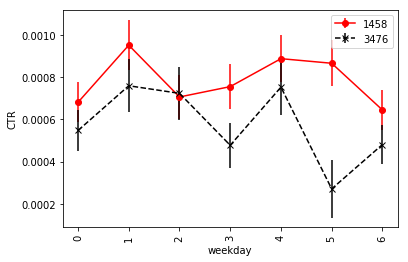

In [156]:
# Plot of weekday
x = weekdays + 1
y1, y2 = ctr_value('weekday')
plot_advertisers(x, y1, y2, 'weekday', line = True)
plt.show()

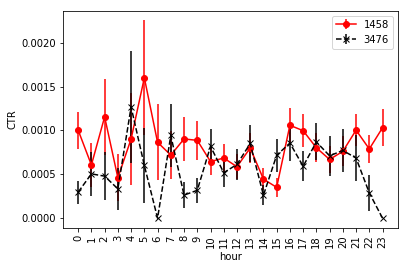

In [157]:
# Ploy of hours
hours = train['hour'].unique()
hours.sort()
x = hours
y1, y2 = ctr_value('hour')
plot_advertisers(x, y1, y2, 'hour', line = True)
plt.show()

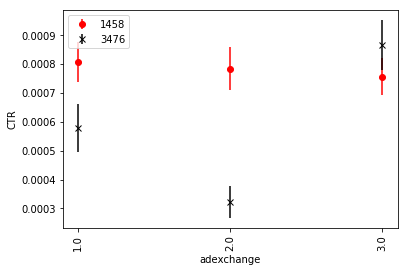

In [158]:
adexchange = train_1458['adexchange'].unique()
adexchange.sort()
x = adexchange
y1, y2 = ctr_value('adexchange')
plot_advertisers(x, y1, y2, 'adexchange', line = False)
plt.show()

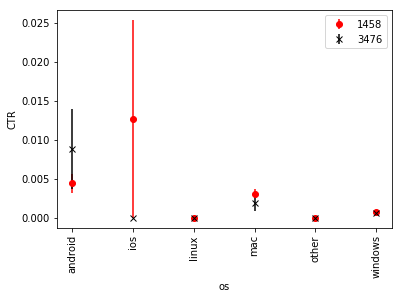

In [159]:
x = train['os'].unique()
x.sort()
y1, y2 = ctr_value('os')
plot_advertisers(x, y1, y2, 'os', line = False)
plt.show()

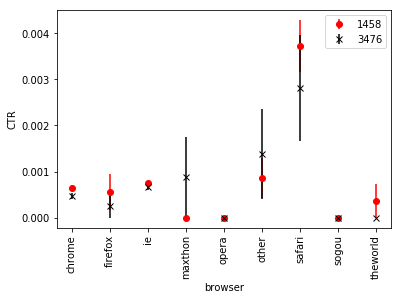

In [160]:
x = train['browser'].unique()
x.sort()
y1, y2 = ctr_value('browser')
plot_advertisers(x, y1, y2, 'browser', line = False)
plt.show()

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:851: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


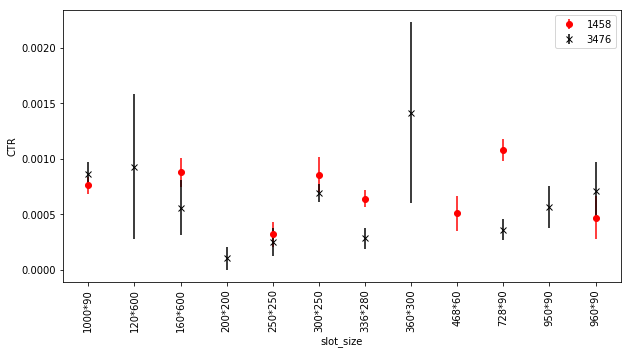

In [161]:
x = train['slot_size'].unique()
x.sort()
y1, y2 = ctr_value('slot_size')
plt.figure(figsize=(10,5))
plot_advertisers(x, y1, y2, 'slot_size', line = False)
plt.show()

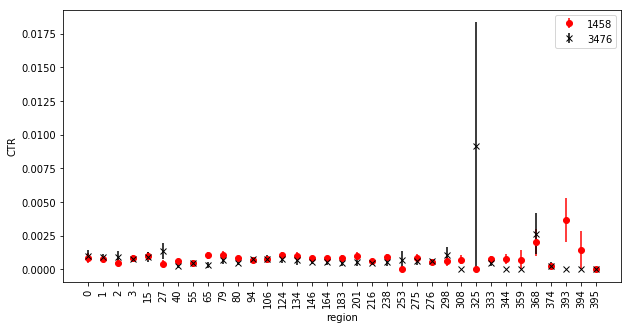

In [169]:
x = train['region'].unique()
x.sort()
y1, y2 = ctr_value('region')
plt.figure(figsize=(10,5))
plot_advertisers(x, y1, y2, 'region', line = False)
plt.show()

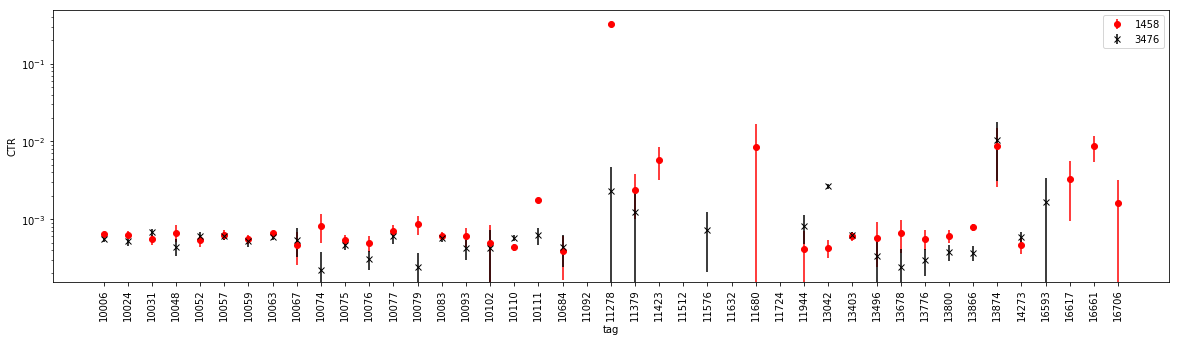

In [170]:
x, y1, y2 = ctr_value_tag()

plt.figure(figsize=(20,5))
plot_advertisers(x, y1, y2, 'tag', line = False)
plt.gca().set_yscale('log')
plt.show()

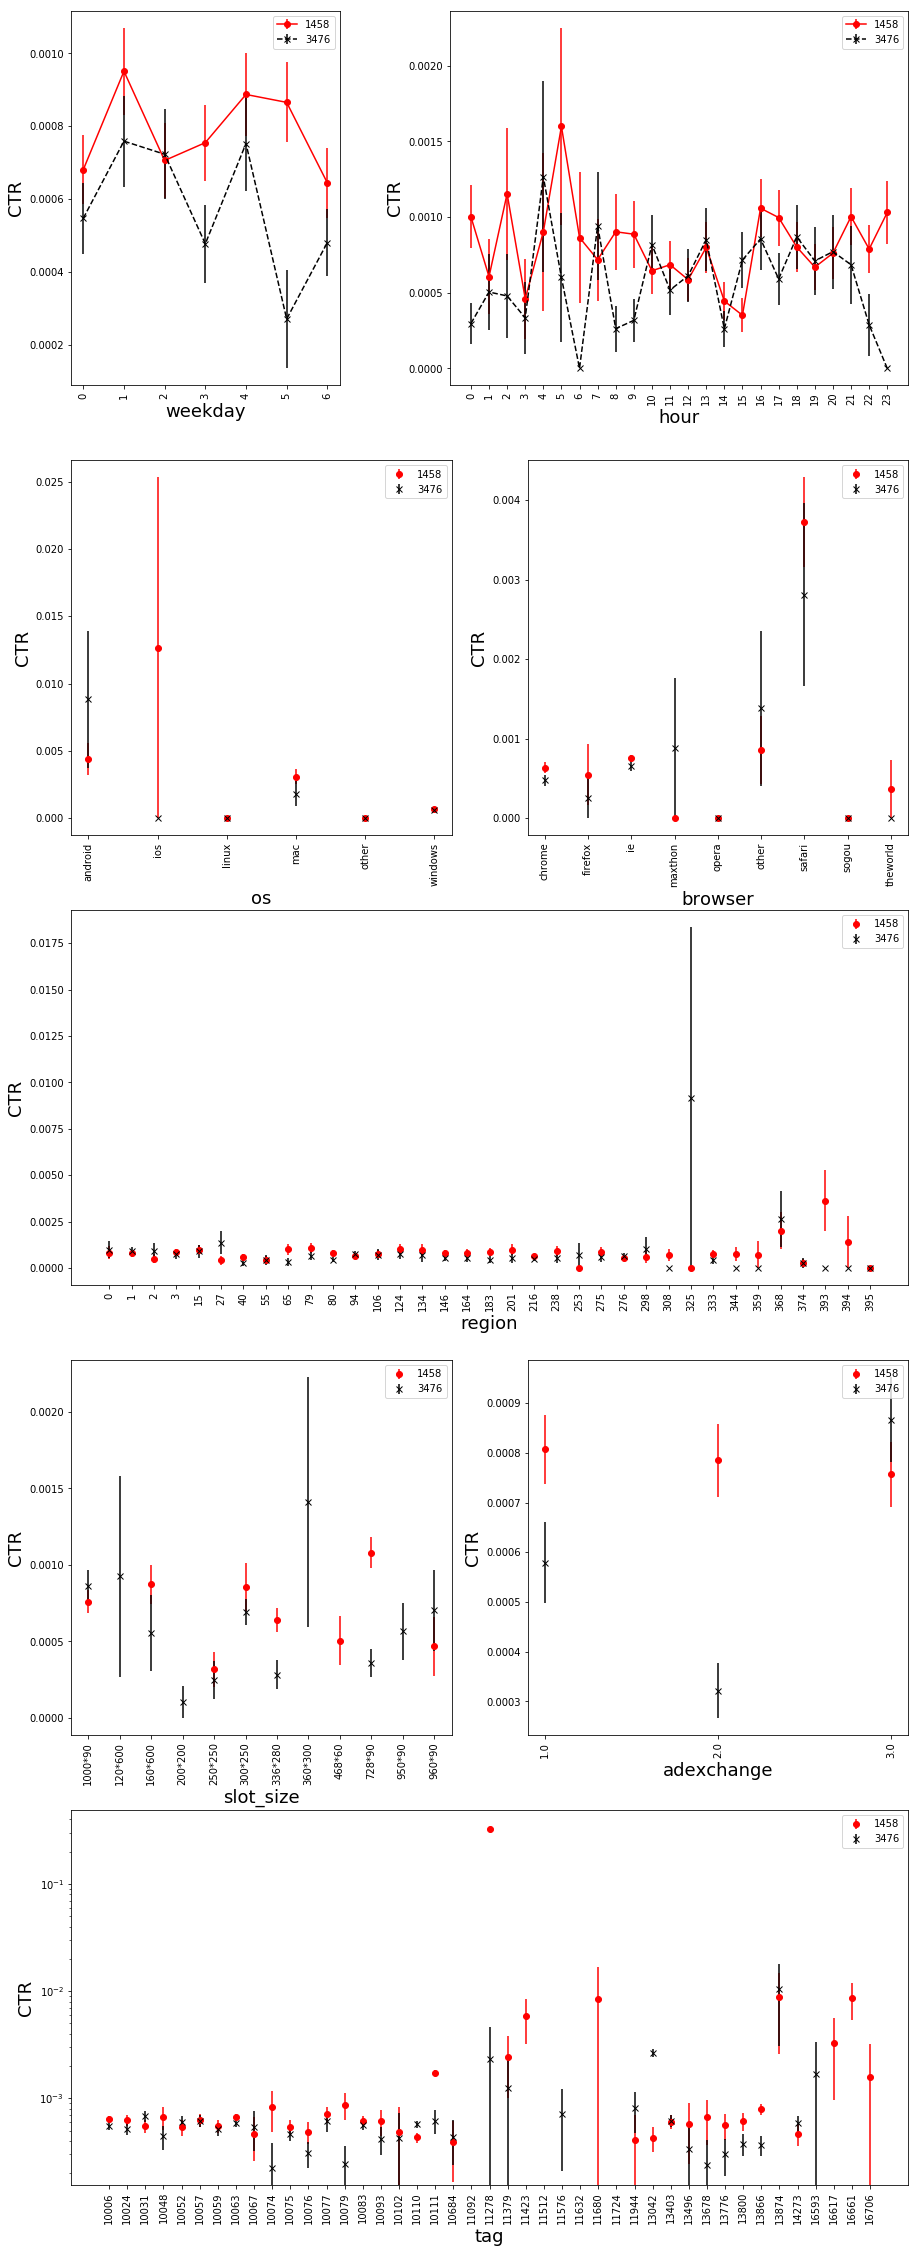

In [171]:
plt.figure(figsize=(15,40))

plt.sca(plt.subplot2grid((5, 9), (0, 0), colspan=3))
x = weekdays + 1
y1, y2 = ctr_value('weekday')
plot_advertisers(x, y1, y2, 'weekday', line = True)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)

plt.sca(plt.subplot2grid((5, 9), (0, 4), colspan=5))
hours = train['hour'].unique()
hours.sort()
x = hours
y1, y2 = ctr_value('hour')
plot_advertisers(x, y1, y2, 'hour', line = True)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)

plt.sca(plt.subplot2grid((5, 2), (1, 0)))
x = train['os'].unique()
x.sort()
y1, y2 = ctr_value('os')
plot_advertisers(x, y1, y2, 'os', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
    
plt.sca(plt.subplot2grid((5, 2), (1, 1)))
x = train['browser'].unique()
x.sort()
y1, y2 = ctr_value('browser')
plot_advertisers(x, y1, y2, 'browser', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)

plt.sca(plt.subplot2grid((5, 2), (2, 0), colspan=2))
x = train['region'].unique()
x.sort()
y1, y2 = ctr_value('region')
plot_advertisers(x, y1, y2, 'region', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)

plt.sca(plt.subplot2grid((5, 2), (3, 0)))
x = train['slot_size'].unique()
x.sort()
y1, y2 = ctr_value('slot_size')
plot_advertisers(x, y1, y2, 'slot_size', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
    
plt.sca(plt.subplot2grid((5, 2), (3, 1)))
adexchange = train_1458['adexchange'].unique()
adexchange.sort()
x = adexchange
y1, y2 = ctr_value('adexchange')
plot_advertisers(x, y1, y2, 'adexchange', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)

plt.sca(plt.subplot2grid((5, 2), (4, 0), colspan=2))
x, y1, y2 = ctr_value_tag()
plot_advertisers(x, y1, y2, 'tag', line = False)
plt.gca().set_yscale('log')
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
plt.savefig('ctr.pdf', pad_inches=0, bbox_inches='tight')
plt.show()

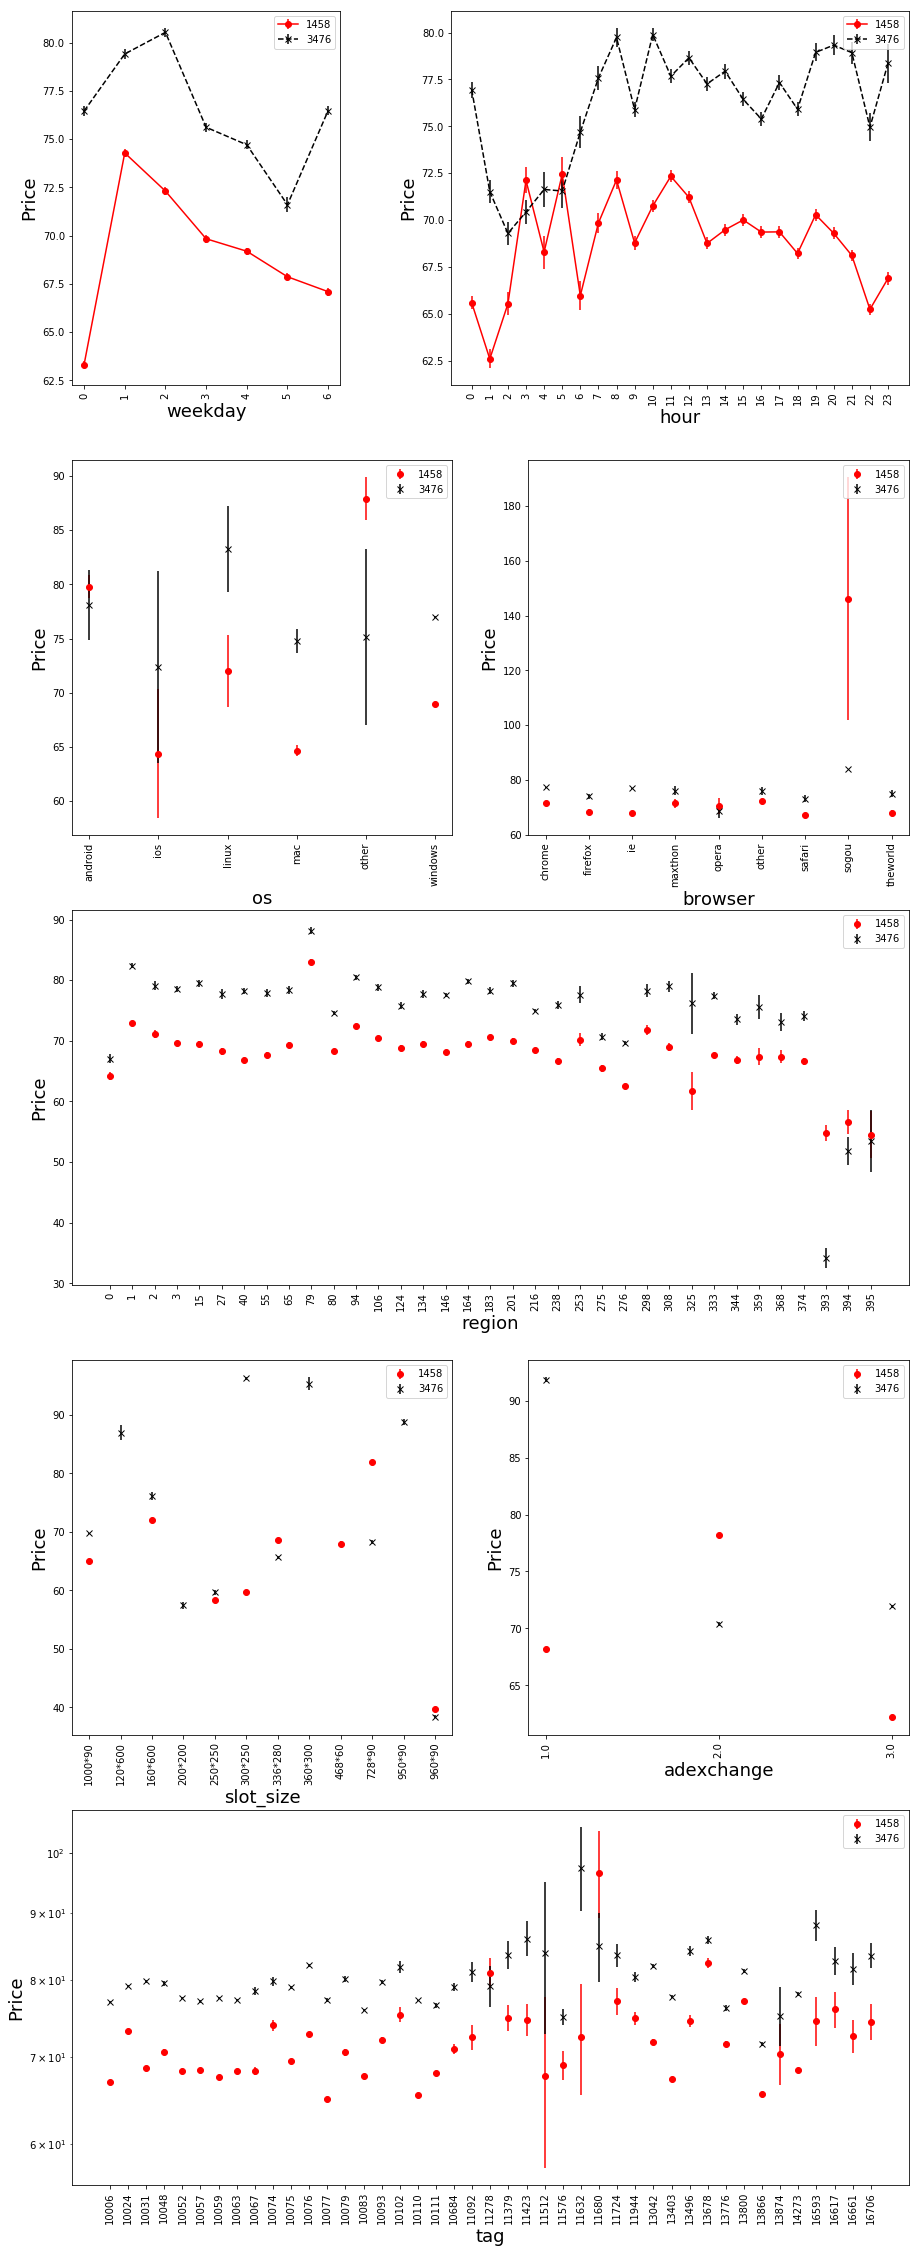

In [172]:
plt.figure(figsize=(15,40))

plt.sca(plt.subplot2grid((5, 9), (0, 0), colspan=3))
x = weekdays + 1
y1, y2 = price_value('weekday')
plot_advertisers_price(x, y1, y2, 'weekday', line = True)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)

plt.sca(plt.subplot2grid((5, 9), (0, 4), colspan=5))
hours = train['hour'].unique()
hours.sort()
x = hours
y1, y2 = price_value('hour')
plot_advertisers_price(x, y1, y2, 'hour', line = True)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)

plt.sca(plt.subplot2grid((5, 2), (1, 0)))
x = train['os'].unique()
x.sort()
y1, y2 = price_value('os')
plot_advertisers_price(x, y1, y2, 'os', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
    
plt.sca(plt.subplot2grid((5, 2), (1, 1)))
x = train['browser'].unique()
x.sort()
y1, y2 = price_value('browser')
plot_advertisers_price(x, y1, y2, 'browser', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)

plt.sca(plt.subplot2grid((5, 2), (2, 0), colspan=2))
x = train['region'].unique()
x.sort()
y1, y2 = price_value('region')
plot_advertisers_price(x, y1, y2, 'region', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)

plt.sca(plt.subplot2grid((5, 2), (3, 0)))
x = train['slot_size'].unique()
x.sort()
y1, y2 = price_value('slot_size')
plot_advertisers_price(x, y1, y2, 'slot_size', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
    
plt.sca(plt.subplot2grid((5, 2), (3, 1)))
adexchange = train_1458['adexchange'].unique()
adexchange.sort()
x = adexchange
y1, y2 = price_value('adexchange')
plot_advertisers_price(x, y1, y2, 'adexchange', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)

plt.sca(plt.subplot2grid((5, 2), (4, 0), colspan=2))
x, y1, y2 = price_value_tag()
plot_advertisers_price(x, y1, y2, 'tag', line = False)
plt.gca().set_yscale('log')
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
plt.savefig('price.pdf', pad_inches=0, bbox_inches='tight')
plt.show()